<a href="https://colab.research.google.com/github/mesrp88/data_cleaning_analysis/blob/main/data_aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import  numpy as np

In [3]:
url='/content/World_Happiness_2015.csv'
happiness2015= pd.read_csv(url)
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [6]:
asia_region= happiness2015[happiness2015['Region']=='Southern Asia']
asia_region

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


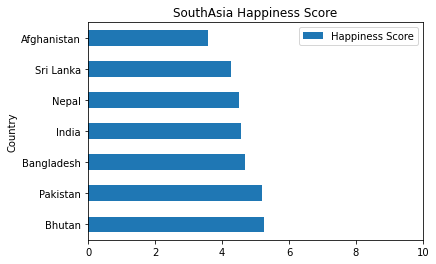

In [7]:
asia_region.plot(kind='barh', x= 'Country', y='Happiness Score',
                                    title='SouthAsia Happiness Score', xlim=(0,10))


Mean happiness score of each region

In [8]:
mean_happiness={}
unique_region= happiness2015['Region'].unique()
for region in unique_region:
    region_group= happiness2015[happiness2015['Region']==region]
    region_mean= region_group['Happiness Score'].mean()
    mean_happiness[region]=region_mean

In [9]:
mean_happiness

{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.144681818181818,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444445,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.202800000000001,
 'Western Europe': 6.689619047619048}

grouby()= split, apply, combined

In [10]:
grouped= happiness2015.groupby('Region')
aus_nz=grouped.get_group('Australia and New Zealand')
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [11]:
grouped.get_group('Southern Asia')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794
80,Pakistan,Southern Asia,81,5.194,0.03726,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
116,India,Southern Asia,117,4.565,0.02043,0.64499,0.38174,0.51529,0.39786,0.08492,0.26475,2.27513
120,Nepal,Southern Asia,121,4.514,0.03607,0.35997,0.86449,0.56874,0.38282,0.05907,0.32296,1.95637
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210


In [12]:
dict(grouped.groups)

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [13]:
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [14]:
means= grouped.mean()
means.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009


In [15]:
grouped = happiness2015.groupby('Region')
happy_grouped= grouped['Happiness Score']
happy_mean= happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [16]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max= happy_grouped.agg([np.mean, np.max])
mean_max_dif= happy_grouped.agg(dif)

In [17]:
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [18]:
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [19]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [25]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


margins parameter helps to find overall mean in this case

In [27]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


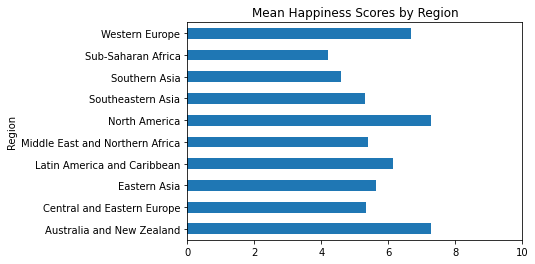

In [29]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region') # aggfun is not provided beacause mean is difficult
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

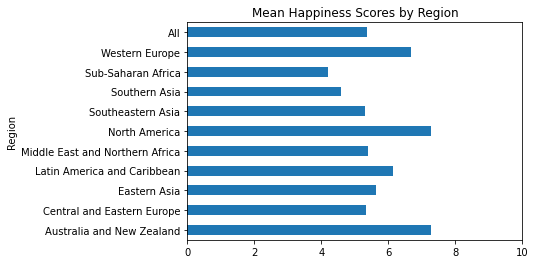

In [30]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)


In [31]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [32]:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [33]:
happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [35]:
grouped= happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats= grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats=happiness2015.pivot_table(index='Region', values=['Family', 'Happiness Score'],
                                                aggfunc= [np.min, np.max, np.mean], margins=True) 
happy_family_stats

Happiness Score         ...   Family          
                                           amin   amax  ...     amax      mean
Region                                                  ...                   
Australia and New Zealand                 7.284  7.286  ...  1.31967  1.314450
Central and Eastern Europe                4.218  6.505  ...  1.34043  1.053042
Eastern Asia                              4.874  6.298  ...  1.30060  1.099427
Latin America and Caribbean               4.518  7.226  ...  1.30477  1.104720
Middle East and Northern Africa           3.006  7.278  ...  1.22393  0.920490
North America                             7.119  7.427  ...  1.32261  1.284860
Southeastern Asia                         3.819  6.798  ...  1.26504  0.940468
Southern Asia                             3.575  5.253  ...  1.10395  0.645321
Sub-Saharan Africa                        2.839  5.477  ...  1.18468  0.809085
Western Europe                            4.857  7.587  ...  1.40223  1.247302

[10 rows x 6 columns]

In [36]:
pv_happy_family_stats

amin  ...            mean
                                  Family  ... Happiness Score
Region                                    ...                
Australia and New Zealand        1.30923  ...        7.285000
Central and Eastern Europe       0.38562  ...        5.332931
Eastern Asia                     0.94675  ...        5.626167
Latin America and Caribbean      0.74302  ...        6.144682
Middle East and Northern Africa  0.47489  ...        5.406900
North America                    1.24711  ...        7.273000
Southeastern Asia                0.62736  ...        5.317444
Southern Asia                    0.30285  ...        4.580857
Sub-Saharan Africa               0.00000  ...        4.202800
Western Europe                   0.89318  ...        6.689619
All                              0.00000  ...        5.375734

[11 rows x 6 columns]

Here I saw uses of groupby and pivot_table